
## MINI Project: LOGISTIC REGRESSION and SVM -- North Carolina Education Data Set

** Austin Hancock, Shravan Kuchkula, Kevin Okiah, Damarcus Thomas **

### Introduction
* For this project will be using North Carolina Schools education data. The data is a combination of multiple data tables publicly available by the North Carolina Department of Public Instruction (NCDPI) which is charged with implementing the state's public school laws and the State Board of Education's policies and procedures governing pre-kindergarten through 12th grade public education. You can learn more about the data by visiting http://www.ncpublicschools.org/data/reports/

* Our starting datasets[All_Data_By_School_Final] and [1516_Test_Scores] were taken from Dr. Drews github where he combines multiple datasets from North Carolina Schools education data, preprocesses them and cleans for Machine learning. You can learn more on the data set from Dr.Drew's github https://github.com/jakemdrew/EducationDataNC.

* We performed Visualization on s usbset of the data targeted for schools with `high schools`, which can be accessed from https://github.com/kevimwe/NC_EDUCATION_DATA/tree/master/NC_EDUC_Visualization_Data_Processing.

In [1]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#import required Libraries
import pandas as pd
import numpy as np

import os 
pd.set_option('display.max_colwidth', -1)
import requests
import io

# Import the stats library
from scipy import stats
import statsmodels.api as sm

# These are the plotting libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use("classic")
import seaborn as sns

#Machine learning
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score


# Command for plots to appear in the iPython Notebook
%matplotlib inline
#Starting with the dataset that Dr.Drew helped clean.->highschools saved to .cvs file from graduations rates (2) notebook
wd = os.getcwd() #get working directory

#Read in raw data

url="https://raw.githubusercontent.com/kevimwe/NC_EDUCATION_DATA/master/NC_EDUC_Visualization_Data_Processing/data/All_Data_By_School_Final.csv"
s=requests.get(url).content

schoolData=pd.read_csv(io.StringIO(s.decode('utf-8')))

url="https://raw.githubusercontent.com/kevimwe/NC_EDUCATION_DATA/master/NC_EDUC_Visualization_Data_Processing/data/1516_Test_Scores.csv"
t=requests.get(url).content

testScores=pd.read_csv(io.StringIO(t.decode('utf-8')))

#Review raw data before the join
schoolData.info()

#join files using school / unit code
schools = schoolData.join(testScores, on='unit_code',how='left', lsuffix='_schoolData', rsuffix='_testScores')
#highschools = pd.read_csv(wd+'/data/highschools.csv', low_memory=False)
#highschools = pd.read_csv(wd+'\\data\\highschools.csv', low_memory=False)
schools.info()


C:\Users\146st\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 293 entries, Year to State_Prin_Exp_Pct_10+_Years
dtypes: float64(255), int64(17), object(21)
memory usage: 5.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 305 entries, Year to Percent GLP
dtypes: float64(262), int64(17), object(26)
memory usage: 6.0+ MB


### Data Meaning Type 

In [2]:
url = 'https://raw.githubusercontent.com/kevimwe/NC_EDUCATION_DATA/master/NC_EDUC_Visualization_Data_Processing/data/DataMeaningType.csv'

s=requests.get(url).content
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_colwidth', 150)
pd.read_csv(io.StringIO(s.decode('utf-8')))


,Attribute,Meaning,Type
0,unit_code,Code to identify School/LEA/State,Object
1,type_cd_txt,Type of school (Chater or Public),Object
2,category_cd,"Category of School (E, M, H, I, T, or A)",Object
3,school_type_txt,Description of School type,Object
4,calendar_only_txt,Description of Calendar (Traditional or Year-Round),object
5,title1_type_flg,Title I Status,bool
6,clp_ind_flg,Consistently low performing school,bool
7,focus_clp_flg,Focus school designation based on CLP,bool
8,summer_program_flg,Summer school program included in Read to Achieve results,bool
9,asm_no_spg_flg,No School Performance Grade due to alternative school status,bool


#### Data Dictionary
> Since this datasets has numerous columns we needed a fast way to quickly find ColumnName description for easy reference. For exceptional work, we created a function to quickly pull the data from csv datafile. This involved converting the pdf to excel and formating the data for easy import into pandas. The code below is a working code for our data dictionary.

In [3]:

DataDict=pd.read_csv(io.StringIO(s.decode('utf-8')))

DataDict.head()
#DataDict = DataDict.columns['COLUMN_NAME', 'DESCRIPTION']
def get_ColDescription(colname = 'Year'):
    colName = input("Enter column name to check description in Dictionary. You can enter multiple columns separated by comma: ")
    
    print('You entered: ', colName.strip())
    temp = pd.DataFrame()
    colNames = colName.split(',')
    
    try:
        for i in range(0,len(colNames)):
            get = (DataDict[DataDict.Attribute==colNames[i].strip().lower()])
            temp = temp.append(get)
        return(temp)
    except Exception as e:
        print(e.args) 

get_ColDescription()

Enter column name to check description in Dictionary. You can enter multiple columns separated by comma: category_cd
You entered:  category_cd


,Attribute,Meaning,Type
2,category_cd,"Category of School (E, M, H, I, T, or A)",Object


### Data Quality

##### *Missing Data Statistics*

> In this section we explore missing data in the highschool data that was created from the original north carolina data. After exploring the missing data we will discusss the approach for handling them.

In [4]:
#Check for missing values
Temp = pd.DataFrame(schoolData.isnull().sum())
#print(Temp)
Temp.columns =['DataMissing']
#Columns with atleast 1 missing value
MissingCount = Temp[Temp.DataMissing>0]

#sort 
MissingCount = MissingCount.sort_values('DataMissing',ascending=False)
#basic starts on missing data
print("##################################################")
print("###", '             Stats on missing data        ',  "###")
print("##################################################")
print('No of rows in schoolData: ',len(schoolData))
print('No of Columns in schoolData: ',len(schoolData.columns))
print('No. of Columns with Missing data: ',len(MissingCount))
print('No  of Complete data columns: ', len(schoolData.columns) - len(MissingCount))
print('No. of Columns with 100% missing Values: ',sum(1 for item in MissingCount.DataMissing if item==len(schoolData)))
print('No. of Columns more than 95% missing Values: ',sum(1 for item in MissingCount.DataMissing if item>=0.95*len(schoolData)))
print('% of Columns with some Missing data: ',round(float(100*len(MissingCount))/len(schoolData.columns),3),'%')
print('% of Columns with 100% Missing data: ',round(float(100*sum(1 for item in MissingCount.DataMissing if item==len(schoolData)))/len(schoolData.columns),3),'%')
print('% of Columns with more than 95% Missing data: ',round(float(100*sum(1 for item in MissingCount.DataMissing if item>=0.95*len(schoolData)))/len(schoolData.columns),3),'%')

print(" ")
print("##################################################")
print("###",'       Columns with >95% missing data     ',    "###")
print("##################################################")
#add a columnName for Bar charts plot
MissingCount['ColumnName'] = MissingCount.index
MissingCount['Missing %'] = 100*(MissingCount.DataMissing/len(schoolData))
MissingCount = MissingCount.reset_index()
del MissingCount['index']
print((MissingCount.head(50)))

##################################################
###              Stats on missing data         ###
##################################################
No of rows in schoolData:  2579
No of Columns in schoolData:  293
No. of Columns with Missing data:  216
No  of Complete data columns:  77
No. of Columns with 100% missing Values:  20
No. of Columns more than 95% missing Values:  27
% of Columns with some Missing data:  73.72 %
% of Columns with 100% Missing data:  6.826 %
% of Columns with more than 95% Missing data:  9.215 %
 
##################################################
###        Columns with >95% missing data      ###
##################################################
    DataMissing                ColumnName   Missing %
0          2579      PASSED_RTA_State_Pct  100.000000
1          2579        prinyrs_0thru3_pct  100.000000
2          2579         GCE_RPF_State_Pct  100.000000
3          2579           esea_attendance  100.000000
4          2579       lea_esea_attendance 

> From above we note, of the 305 columns in SchoolData, 228 (74.8%) of them have some missing data. 32(10.5%) of columns have all the data missing where 39 (12.8%) of the columns miss more than 95% of the data. For columns with 100% missing data we are left but to wonder if this were new fields introduced recently and the schools are not fully informed to collect this data or the data for this columns was not just collected by mistake. On the other hand, for the partally completed datasets, some schools might have left these columns blank if they didn't apply to them.

> For the sake of this analysis we will drop the columns that have `>95` missing data rather than try complete the missing data with either mean, median or mode. If we complete this large amount of missing rows of data with predetermined data, our model maybe baised and throw were predictions off.

In [5]:
#All columns from Original schoolData
AllColumns =schoolData.columns 

# All columns with some missing value
ColumnsWithMissingdata = MissingCount.ColumnName 

#columns with more than 95% missing data
Columns2Drop = MissingCount.ColumnName.head(38) 

#columns with missing values that are kept
Columns2Keep = MissingCount.ColumnName.tail(len(MissingCount)-99) 

#All the other columns except those with >95% missing data
SelectedColumns = list(set(AllColumns)-set(Columns2Drop)) 

#new dataset, columns with >95% missing data dropped

schoolDataNew = schoolData[SelectedColumns]

#drop the key column. 
del schoolDataNew['unit_code']

print("##################################################")
print("###", '          Orginal Highschooldata info     ',  "###")
print("##################################################")
print(schoolData.info())
print("##################################################")
print("###", '  Columns with >95 data missing   dropped ',  "###")
print("##################################################")
print(schoolDataNew.info())
schoolDataNew.head(5)


##################################################
###           Orginal Highschooldata info      ###
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 293 entries, Year to State_Prin_Exp_Pct_10+_Years
dtypes: float64(255), int64(17), object(21)
memory usage: 5.8+ MB
None
##################################################
###   Columns with >95 data missing   dropped  ###
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 254 entries, st_avg_student_num to Cohort Graduation Rate Standard Score
dtypes: float64(218), int64(17), object(19)
memory usage: 5.0+ MB
None


,st_avg_student_num,lea_total_expense_num,lea_tchyrs_4thru10_pct,st_stud_internet_comp_num,The ACT Score,AP_Courses_Offered,EVAAS Growth Status,st_total_specialized_courses,nat_sat_avg_score_num,st_sat_avg_score_num,...,st_state_perpupil_num,lea_1yr_tchr_trnovr_pct,school_type_txt,State_Tch_Exp_Pct_10+_Years,lea_salary_expense_pct,Avg_Dist_Size_Biology,GCE_SWD_School_Pct,Avg_Class_Size_02,GCE_ALL_School_Pct,Cohort Graduation Rate Standard Score
0,511,NaN,NaN,1.2,NaN,NaN,NaN,NaN,1006,997,...,5718.43,NaN,Regular School,0.547,NaN,NaN,NaN,22.0,0.000,NaN
1,475,NaN,NaN,1.2,NaN,NaN,NaN,NaN,1006,997,...,5718.43,NaN,Regular School,0.491,NaN,NaN,NaN,NaN,0.042,NaN
2,860,8517.96,0.240,1.2,NaN,NaN,NaN,NaN,1006,997,...,5718.43,0.130,Regular School,0.534,0.631,18.0,NaN,NaN,NaN,NaN
3,493,8517.96,0.256,1.2,NaN,NaN,NaN,NaN,1006,997,...,5718.43,0.117,Regular School,0.500,0.631,NaN,NaN,22.0,0.131,NaN
4,493,8517.96,0.256,1.2,NaN,NaN,NaN,NaN,1006,997,...,5718.43,0.117,Regular School,0.500,0.631,NaN,NaN,20.0,0.214,NaN


> In the code block above, we drop 38 columns which have >95% of the data missing. We also delete the unit_code column which is a key to identify the school/Lea/state. 

In [6]:
#Exploring the columns with missing dataset that are retained
df = schoolDataNew[Columns2Keep]
temp_df = df.copy() 
print("##################################################")
temp  = df.select_dtypes(include=['int','float'])
temp2  = df.select_dtypes(include=['object', 'bool'])
print("#      Columns with continious data (int, float) #")
print("##################################################")
temp.info()
print(" ")
print("##########################################")
print("#     Columns with Categorical data      #")
print("##########################################")
temp2.info()
print(" ")
print("Total # of columns: ",len(Columns2Keep))

##################################################
#      Columns with continious data (int, float) #
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 108 entries, Avg_Dist_Size_04 to flicensed_teach_pct
dtypes: float64(108)
memory usage: 2.1 MB
 
##########################################
#     Columns with Categorical data      #
##########################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 9 columns):
Reading SPG Grade       1870 non-null object
Math SPG Grade          1870 non-null object
EVAAS Growth Status     2312 non-null object
grades_BYOD             2313 non-null object
grades_1_to_1_access    2313 non-null object
Byod                    2313 non-null object
1_to_1_access           2313 non-null object
SPG Grade               2364 non-null object
calendar_only_txt       2578 non-null object
dtypes: object(9)
memory us

> In the code block above we explore the columns with missing data that we retained. we group the columns into two based on data type as we will have two different approaches for replacing the missing data;
1. #### Columns with continuous data types (ints and floats)
Of the 129 columns retained with missing data, 120 are of dtype float64. After reviewing individual columns description from the data dictionary, we choose to replace these missing float types with median. We didn't go with mean simply because with existance of outliers, mean would be screwed compared to median.
2. #### Columns with contegorical data types (objects and bool)
For the 9 categorical columns, we will be replacing the missing values with mode.

In [7]:
#this function replaces NA's for columns with continous 'Con' (int or float) variables with median and categorical 'Cat' variable(bool or object) with mode
def ReplaceMissingdata(df = schoolDataNew):
    temp_df = df.copy() 
    print("#######################################")
    print("## continous and categorical columns ##")
    print("#######################################")
    temp  = df.select_dtypes(include=['int64','float'])    #continuous values columns
    columnnames = temp.columns
    temp1  = df.select_dtypes(include=['object','bool']) #catagorical values columns
    columnnames1 = temp1.columns
    print(" ")
    
    print("##############################")
    print("## NA count Before Cleaning ##")
    print("##############################")
    print(df.isnull().sum())
    #replacing missing continous values with median
    for i in range(0,len(columnnames)):
        try:
            temp_array =temp[temp[columnnames[i]]!=np.nan][columnnames[i]] #temp array of non NAs for continous values to calculate median
            # replace NAs with median for continous variables created from above arrays
            temp_df[columnnames[i]] =temp_df[columnnames[i]].replace(np.nan,temp_array.median())     
        except Exception as e:
            print(e.args) 
            
    #replacing missing contegorical values with mode
    for i in range(0,len(columnnames1)):
        try:
            temp_array1 =temp1[temp1[columnnames1[i]]!=np.nan][columnnames1[i]] #temp array of non NAs for categorical values to calculate mode
            # replace NAs with median for categorical values created from above arrays with mode
            temp_df[columnnames1[i]] =temp_df[columnnames1[i]].replace(np.nan,str(temp_array1.mode()[0]))      
        except Exception as e:
            print(e.args)

    print("##############################")
    print("## NA Count After Cleaning  ##")
    print("##############################")
    print(temp_df.isnull().sum())
    df = temp_df
    return df

new_schooldata = ReplaceMissingdata(schoolDataNew)    

new_schooldata.info()

#######################################
## continous and categorical columns ##
#######################################
 
##############################
## NA count Before Cleaning ##
##############################
st_avg_student_num                                   0
lea_total_expense_num                              160
lea_tchyrs_4thru10_pct                             160
st_stud_internet_comp_num                            0
The ACT Score                                     2077
AP_Courses_Offered                                2226
EVAAS Growth Status                                267
st_total_specialized_courses                      1971
nat_sat_avg_score_num                                0
st_sat_avg_score_num                                 0
Dist_Prin_Exp_Pct_4_10_Years                       160
st_not_highqual_class_all_pct                        0
lea_state_perpupil_num                             160
st_flicensed_teach_pct                               0
st_highqual_cla

> In the code block above, we replaced missing catagorical values with mode and missing continuous values with median. A total of 129 columns with missing values have been cleaned

In [8]:
new_schooldata.shape

(2579, 254)

category_cd
A      63
E    1320
H     505
I     142
M     478
T      71
dtype: int64

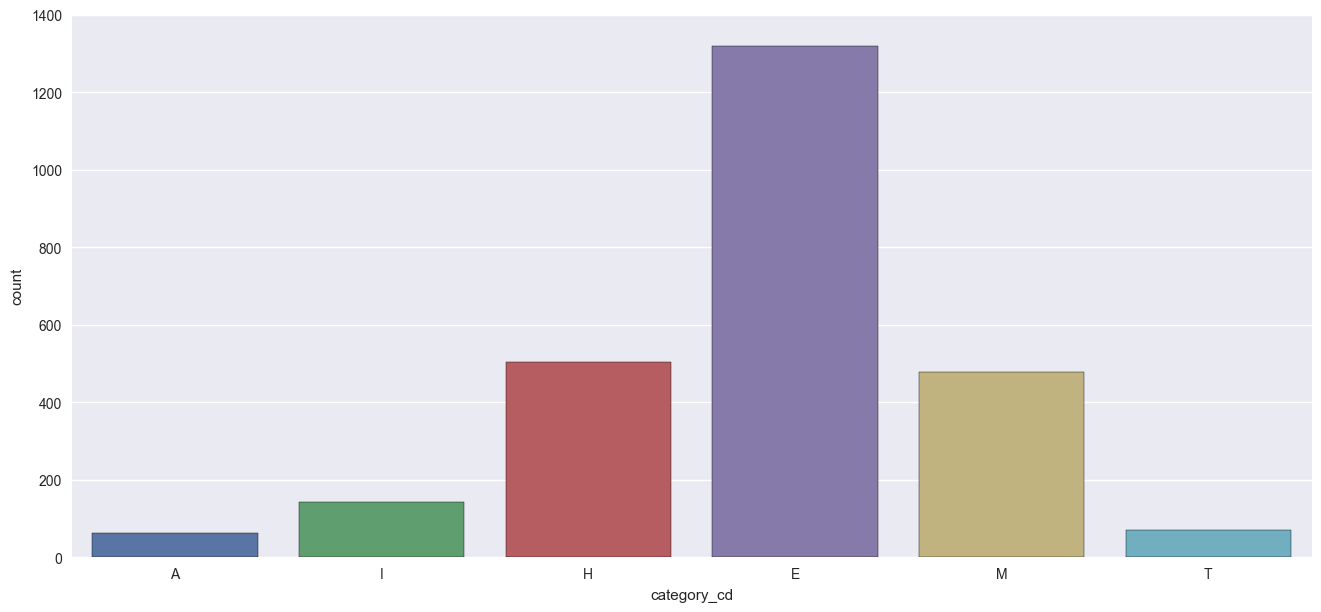

In [9]:
# School Category Factor plot 
fig, ax = plt.subplots(figsize=(16, 7))
sns.countplot("category_cd",data=new_schooldata)
new_schooldata.groupby(["category_cd"]).size()

>  The bar graph above is shows the distribution of different school categories in state of North Carolina. See summary table below for school category descriptions and % distribution

Category | Description|Count |Percentage
--- | --- | ---|---
A | School has elementary, middle, and high school grades  | 63|2.44%
E | School has elementary schools grades (PK-5) | 1320|51.18%
H | School has high schools grades (9-13)  | 505|19.58%
I | Schools with elementary, middle and high school grades | 142|5.51%
M | School has middle schools grades (6-8)  | 478|18.53%
T | School has middle and high school grades | 71|2.75%

### New Features

In [10]:
#1
#################################################
#               New Features                    #
#################################################
# create Factors for 'Overall Achievement Score'
# A: 85-100
# B: 70-84
# C: 55-69
# D: 40-54
# F:<40
new_schooldata = new_schooldata.assign(Overall_Achievement_Score_bins = pd.cut(np.array(new_schooldata['Overall Achievement Score']), 
                                              5, labels=["<40", "40-54", "55-69",'70-84',"85-100"]))
#2
#SchoolWeightedScore:  Summation of all achievement measures Scores.
bin1 = ['EVAAS Growth Score','Overall Achievement Score' ] # Weight 0.6
bin2 = ['The ACT Score','ACT WorkKeys Score' ,'Math Course Rigor Score'] # weight 0.3
bin3 = ['Math I Score', 'English II Score','Biology Score'] # EOC scores weight 0.1
#print(Achievement_measures)
new_schooldata = new_schooldata.assign(BIN1=new_schooldata[bin1].sum(axis=1)*.6)
new_schooldata = new_schooldata.assign(BIN2=new_schooldata[bin2].sum(axis=1)*.3)
new_schooldata = new_schooldata.assign(BIN3=new_schooldata[bin3].sum(axis=1)*.1)
groupedbins = ['BIN1','BIN2','BIN3']
new_schooldata = new_schooldata.assign(SchoolWeightedScore = new_schooldata[groupedbins].sum(axis =1))


School_Final = new_schooldata.drop(groupedbins, 1)
School_Final.T


,0,1,2,3,4,5,6,7,8,9,...,2569,2570,2571,2572,2573,2574,2575,2576,2577,2578
st_avg_student_num,511,475,860,493,493,634,860,493,493,860,...,475,511,493,860,475,493,493,475,475,475
lea_total_expense_num,8795.42,8795.42,8517.96,8517.96,8517.96,8517.96,8517.96,8517.96,8517.96,8517.96,...,8795.42,8795.42,8795.42,8795.42,8795.42,8795.42,8795.42,8795.42,8795.42,8795.42
lea_tchyrs_4thru10_pct,0.26,0.26,0.24,0.256,0.256,0.29,0.24,0.256,0.256,0.24,...,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26
st_stud_internet_comp_num,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,...,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2
The ACT Score,61.5,61.5,61.5,61.5,61.5,61.5,61.5,61.5,61.5,61.5,...,61.5,29,61.5,71,61.5,61.5,61.5,61.5,61.5,61.5
AP_Courses_Offered,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
EVAAS Growth Status,Met,Met,Met,Met,Met,Met,Met,Met,Met,Met,...,Met,Exceeded,Met,Met,Met,Met,NotMet,NotMet,Exceeded,Met
st_total_specialized_courses,0.964635,0.964635,0.964635,0.964635,0.964635,0.964635,0.964635,0.964635,0.964635,0.964635,...,0.964635,0.964635,0.964635,0.964635,0.964635,0.964635,0.964635,0.964635,0.964635,0.964635
nat_sat_avg_score_num,1006,1006,1006,1006,1006,1006,1006,1006,1006,1006,...,1006,1006,1006,1006,1006,1006,1006,1006,1006,1006
st_sat_avg_score_num,997,997,997,997,997,997,997,997,997,997,...,997,997,997,997,997,997,997,997,997,997


> From above code, we have created two new features from our dataset.

> 1. Overall_Achievement_Score_bins:
this is to groub the Overall Achievement Score into bins 
A: 85-100,
B: 70-84,
C: 55-69,
D: 40-54,
F:<40
> 2. SchoolWeightedScore: Summation of all achievement measures Scores.`EVAAS Growth Score` and `Overall Achievement Score` are put on bin1 and given a  weight 0.6 of the overall weighted school school.`The ACT Score`, `ACT WorkKeys Score` , and `Math Course Rigor Score` are put in bin 2 carrying a weight of 0.3 while bin3 contains End of Course scores for `Math I Score`, `English II Score`, and `Biology Score` given a weight 0.1. When we get to lab two, we will use this features to see if they improve our model performance.


### moving forward we will use this data with the new created features for modeling

In [11]:
modelingdata=School_Final.copy()

In [12]:
#url="https://raw.githubusercontent.com/kevimwe/NC_EDUCATION_DATA/master/NC_EDUC_Visualization_Data_Processing/data/modelingdata.csv"
s=requests.get(url).content

#modelingdata=pd.read_csv(io.StringIO(s.decode('utf-8')))
modelingdata.head()

,st_avg_student_num,lea_total_expense_num,lea_tchyrs_4thru10_pct,st_stud_internet_comp_num,The ACT Score,AP_Courses_Offered,EVAAS Growth Status,st_total_specialized_courses,nat_sat_avg_score_num,st_sat_avg_score_num,...,school_type_txt,State_Tch_Exp_Pct_10+_Years,lea_salary_expense_pct,Avg_Dist_Size_Biology,GCE_SWD_School_Pct,Avg_Class_Size_02,GCE_ALL_School_Pct,Cohort Graduation Rate Standard Score,Overall_Achievement_Score_bins,SchoolWeightedScore
0,511,8795.42,0.260,1.2,61.5,7.0,Met,0.964635,1006,997,...,Regular School,0.547,0.626,19.0,0.119,22.0,0.000,90.0,55-69,173.07
1,475,8795.42,0.260,1.2,61.5,7.0,Met,0.964635,1006,997,...,Regular School,0.491,0.626,19.0,0.119,19.0,0.042,90.0,55-69,173.07
2,860,8517.96,0.240,1.2,61.5,7.0,Met,0.964635,1006,997,...,Regular School,0.534,0.631,18.0,0.119,19.0,0.098,90.0,55-69,173.07
3,493,8517.96,0.256,1.2,61.5,7.0,Met,0.964635,1006,997,...,Regular School,0.500,0.631,19.0,0.119,22.0,0.131,90.0,55-69,173.07
4,493,8517.96,0.256,1.2,61.5,7.0,Met,0.964635,1006,997,...,Regular School,0.500,0.631,19.0,0.119,20.0,0.214,90.0,55-69,173.07


In [13]:
modelingdata.shape

(2579, 256)

In [14]:
modelingdata.Overall_Achievement_Score_bins.head()

0    55-69
1    55-69
2    55-69
3    55-69
4    55-69
Name: Overall_Achievement_Score_bins, dtype: category
Categories (5, object): [<40 < 40-54 < 55-69 < 70-84 < 85-100]

> # LOGISTIC REGRESSION and SUPPORT VECTOR MACHINE

### SECTION 1  [50 Points ]: 
1. Create a logistic regression model and a support vector machine model for the classification task involved with your dataset.

2. Assess how well each model performs (use 80/20 training/testing split for your data). 
3. Adjust parameters of the models to make them more accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines. 
4. For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe. 

#### summer_program_flg  Classification

For this Classification exercise (Logistic regression and SVM) modeling we have choosen to build models to predict if a school has a summer program or not which is depicted by the boolean attribute `summer_program_flg` based on all the other features of the North Carolina Education data. In the code block below we create two datasets, the observed data X and an external variable y.

In [15]:
%%time
#Create data = x
df_X = modelingdata.copy()
#create target = Y
df_y = df_X.summer_program_flg.abs()
print('X shape before ')
print(df_X.shape)
#drop the response column from the x dataset
df_X.pop('summer_program_flg')
print('X shape after ')
print(df_X.shape)
print('Y shape after ')
print(df_y.shape)



X shape before 
(2579, 256)
X shape after 
(2579, 255)
Y shape after 
(2579,)
Wall time: 9 ms


> in above code, we split that data into X and y for modeling

Summer_program_flg
Counter({0: 1702, 1: 877})


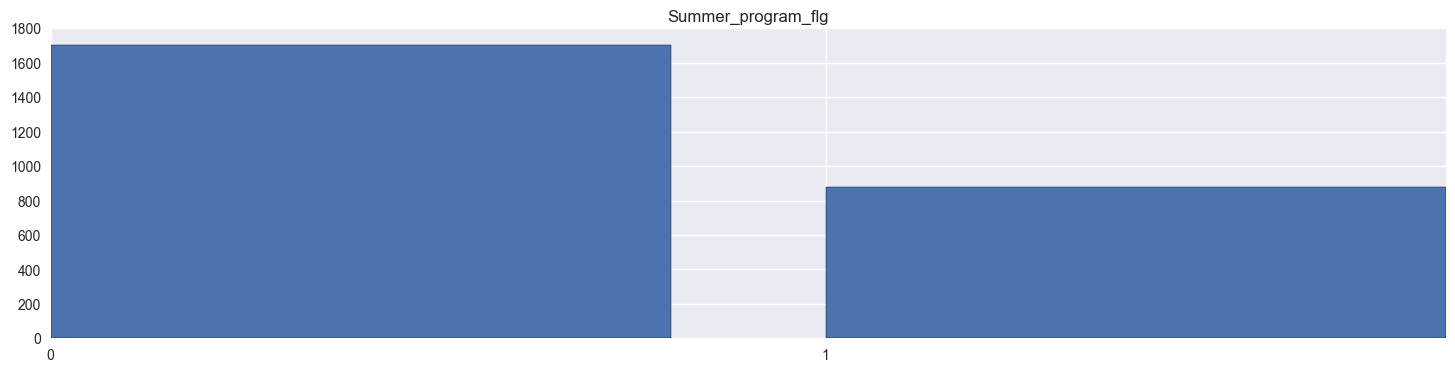

Wall time: 334 ms


In [16]:
%%time
import collections
import matplotlib.pyplot as plt
a = df_y
data=collections.Counter(a)
print('Summer_program_flg')
print(data)

names = list(data.keys())
values = list(data.values())
plt.figure(figsize = (18,4))
plt.title('Summer_program_flg')
plt.bar(range(len(data)),values,tick_label=names)

#plt.savefig('bar.png')
plt.show()

The spread of the summer_program_flag is good  for classification with 1720 samples for false and 877 for true as shown in the bar chart above though Skewed more to the false (0) flag.

### Data Preparation for Classification

In [17]:
%%time
def dummy_Create(df):
    schoolDataFinal = df.copy()
    SchoolDataCat = schoolDataFinal.loc[:,(schoolDataFinal.dtypes == bool)| (schoolDataFinal.dtypes == object) |(schoolDataFinal.dtypes == 'category')]#.columnscategory
    
    # drop the two street address columns
    try: 
        SchoolDataCat.pop('street_ad')
        #SchoolDataCat.pop('scity_ad')
    except Exception as e:
        print(e.args)
    print(SchoolDataCat.columns)
    cat_vars=SchoolDataCat.columns
    for var in cat_vars:
        cat_list='var'+'_'+var
        cat_list = pd.get_dummies(schoolDataFinal[var], prefix=var)
        df=pd.concat([df,cat_list], axis=1)
    data=df
    cat_vars=SchoolDataCat.columns
    data_vars=data.columns.values.tolist()
    
    to_keep=[i for i in data_vars if i not in cat_vars]

    ## Final data columns
    data_final=data[to_keep]
    try:
        data_final.pop('street_ad')
        #data_final.pop('scity_ad')
    except Exception as e:
        print(e.args)
    data_final.columns.values
    data_final_vars=data_final.columns.values.tolist()
    #return(SchoolDataCat)
    y=['summer_program_flg']
    X=[i for i in data_final_vars if i not in y]
 
    list(data_final_vars)
    print(y)
    #print(X)
    SchoolDataCat.describe().T
    return(data_final.abs())
    
df_X_new = dummy_Create(df_X)


Index(['EVAAS Growth Status', 'calendar_only_txt', 'scity_ad',
       'Grad_project_status', 'New_ind_Txt', 'type_cd_txt', 'category_cd',
       'Reading SPG Grade', 'Closed_Ind_Text', '1_to_1_access', 'esea_status',
       'grades_BYOD', 'SPG Grade', 'Math SPG Grade', 'state_ad',
       'grades_1_to_1_access', 'Byod', 'school_type_txt',
       'Overall_Achievement_Score_bins'],
      dtype='object')
['summer_program_flg']
Wall time: 1.07 s


> For the purpose of modeling, we encode selected categorical columns as individual integer columns with 1 and zeros. This is achived using the function  above which identifies catagorical columns and creates dummy variables for them then deletes the old features from weather the dummy variables have been derieved from. 

> We also deleted street address column as each school would have unique address but kept the scity_ad which is the city address to see if geograpical location impacted the existance of the summer flag.

> The code block that follows just show the categorical columns that we end up encoding

> When we attempted to run the logistic model the firt time we noticed that some boolean columns we encoded as -1 and 0. We called abs() fuction on the data to convert all the negative values to positive in order to run our model.

In [18]:
%%time
lsted = ['grades_1_to_1_access', 'grades_BYOD', 'EVAAS Growth Status',
       'SPG Grade', 'Byod', 'scity_ad', '1_to_1_access', 'school_type_txt',
       'esea_status', 'Math SPG Grade', 'calendar_only_txt', 'Closed_Ind_Text',
       'New_ind_Txt', 'Grad_project_status', 'category_cd', 'state_ad',
       'type_cd_txt', 'Reading SPG Grade', 'Overall_Achievement_Score_bins']

for i in lsted:
    print(i)
    print("*******************")
    print(pd.unique(df_X[i]))

grades_1_to_1_access
*******************
['-' '9:10:11:12' '10:11:12' '6:07:08' '9:10' '6' '4:05' '5:06' '7'
 '9:10:11:12:13' '7:08' '6:7:8:9:10:11:12' '5:06:07' '9:12' '6:08'
 '3:04:05' '6:7:8:9:10:11:12:13' '4:05:06' '3' 'K:1:2:3' '4' '9:10:12'
 'K:1:2:3:4:5' 'K:1:2:3:4:5:6:7:8' '5' '6:07' '11:12:13' '8' 'PK'
 '4:5:6:7:8:9:10:11:12' '9' '6:7:8:9' '8:09' '5:6:7:8:9:10:11:12' '9:10:11'
 '6:7:8:9:10' '8:9:10:11:12']
grades_BYOD
*******************
['-' '6' '9:10:11:12' '3:4:5:6:7:8:9:10:11:12' '3:4:5:6:7:8'
 '9:10:11:12:13' '6:07:08' 'K:1:2:3:4:5' 'K:1:2:3:4:5:6:7:8' 'K:1:2:3:4'
 'PK:K:1:2:3' '7:08' 'PK:K:1:2:3:4' '5:06' '4:05' '2:03:04' '1:2:3:4:5'
 '2:3:4:5' '9:11:12' '3:04:05' 'PK:K:1:2:3:4:5' 'PK:9:10:11:12' '5'
 '6:7:8:9:10:11:12' 'PK:5' 'PK:K:1:2:3:4:5:7:8' '9:10:11'
 'PK:K:1:2:3:4:5:6:7:8' 'K:1:2:3:4:5:6' '7:8:9:10:11:12' '8:9:10:11:12'
 'K:1:2:3:4:5:6:7:8:9:10:11:12:13' '6:7:8:9:10' '6:7:8:9:11:12' '3:04' '3'
 'K:3:4' '5:6:7:8' '7' 'K:1:2:4:5' 'PK:K:1:2:3:4:5:6:7:8:9:10:11:12:13

#### Splitting dataset into train and test datasets

In [19]:
df_X = df_X_new.copy()
df_X.shape

(2579, 889)

> After completing the data encoding, we split our data into 80% instances for train dataset and the remaining 20% for the test dataset. We use a random_state seed of 4 to ensure reproducibility of our results.

> For the purposes of cross validation, we repeat this process of separating the testing and training data 10 times. We will use this cross validation method built into scikit-learn.

> `The Code block below is derived from Proffesor Larson's notebook on Logits and SVM for MSDS 7331` https://github.com/eclarson/DataMiningNotebooks/blob/master/04.%20Logits%20and%20SVM.ipynb

> On the raw dataset,as shown below, we have a model with an accuracy of about 71%. For repeatable results, we continue to use a random_state seed of 4 for the shuffle splits.

#### Trial logistic regression on the raw dataset.

In [20]:
%%time
# run logistic regression and vary some parameters
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

X = df_X.values
y = df_y.values

num_cv_iterations = 10
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2, random_state = 4)
                         
print(cv_object)
# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time

ShuffleSplit(n_splits=10, random_state=4, test_size=0.2, train_size=None)
====Iteration 0  ====
accuracy 0.734496124031
confusion matrix
 [[307  44]
 [ 93  72]]
====Iteration 1  ====
accuracy 0.71511627907
confusion matrix
 [[291  44]
 [103  78]]
====Iteration 2  ====
accuracy 0.72480620155
confusion matrix
 [[304  33]
 [109  70]]
====Iteration 3  ====
accuracy 0.672480620155
confusion matrix
 [[296  55]
 [114  51]]
====Iteration 4  ====
accuracy 0.676356589147
confusion matrix
 [[283  48]
 [119  66]]
====Iteration 5  ====
accuracy 0.718992248062
confusion matrix
 [[300  49]
 [ 96  71]]
====Iteration 6  ====
accuracy 0.742248062016
confusion matrix
 [[303  32]
 [101  80]]
====Iteration 7  ====
accuracy 0.709302325581
confusion matrix
 [[297  36]
 [114  69]]
====Iteration 8  ====
accuracy 0.695736434109
confusion matrix
 [[294  40]
 [117  65]]
====Iteration 9  ====
accuracy 0.709302325581
confusion matrix
 [[306  50]
 [100  60]]
Wall time: 15.8 s


In [21]:
#create test and training sets from data and target created above
X_train,X_test,y_train,y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state = 4)

#### RUN CORRELATION to get the highly correlated columns to eliminnate
To improve the perfomance of our logistics regression model, we begin by running a correlation matrix on our X dataset to identify Multicollinearity of predictors and eliminate the highly correlated predictors.

In [22]:
%%time
#finding a list of the most correlated features
print('X df before running correlation')
print(df_X.shape)
c = df_X.corr().abs()
s =pd.DataFrame(c.unstack())
#so = s.order(kind="quicksort")
s['Correlation Pair'] = s.index
s = s.reset_index()
#del s['index']
s.columns = ['Column1', 'Column2', 'correlation','Correlation Pair']
result = s.sort_values('correlation', ascending=0)



#filter to correlation between range
result1 =  result[(result.correlation < 0.95)]

result1
#combine the columns into a list
col= pd.DataFrame(result1.Column1)
col.columns = ['Columns']
col1 =pd.DataFrame(result1.Column2)
col1.columns = ['Columns']
df = col.append(col1)

#find only unique columns
UniqueColumns =pd.unique(df.Columns)

df_X = df_X[UniqueColumns]

#shape on the new df_X
df_X.reset_index()
df_y.reset_index()
print('X df after running correlation')
print(df_X.shape)
result.head()

X df before running correlation
(2579, 889)
X df after running correlation
(2579, 864)
Wall time: 16.1 s


In the code block above we find the run correlation on the X df to identify the most strongly correlated features >0.95 and remove them.  25 features are eliminated for being highly correlated thus redundant.

## Feature selection

> The next step in our feature selection is selection of top  features using chi-squared test.

> In the section below, we perform a systematic feature selection to identify the optimal number of features that we need to fit our data the best by looking at the model accuracy based on % of features used.

> Reference:
> https://nbviewer.jupyter.org/url/bmobasher.com/Class/CSC478/Titanic.ipynb 

> http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html

1 0.676166000381
6 0.708664920412
11 0.710696177276
16 0.713948439719
21 0.720881840414
26 0.7135335669
31 0.727588996764
36 0.722267312451
41 0.736761319539
46 0.717412668951
51 0.719816606628
56 0.734715968165
61 0.728055946053
66 0.728970258753
71 0.742502269765
76 0.733810899266
81 0.737699611211
86 0.736252727379
91 0.726651437274
96 0.69125353278
Optimal percentile of features:71 

("'numpy.ndarray' object has no attribute 'columns'",)
Wall time: 7min 45s


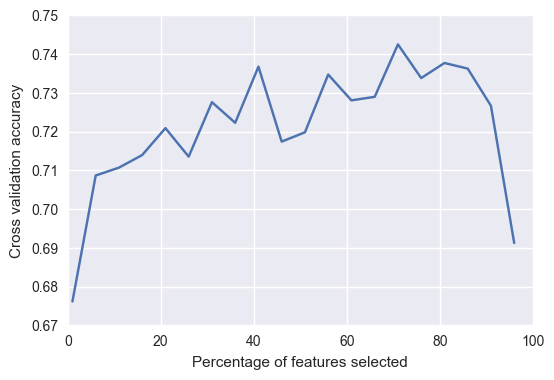

In [23]:
%%time
from sklearn import cross_validation
from sklearn import feature_selection
from sklearn.linear_model import LogisticRegression
dt = LogisticRegression( C=1, class_weight=None) 

percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    scores = cross_validation.cross_val_score(dt, X_train_fs, y_train, cv=20)
    print(i,scores.mean())
    results = np.append(results, scores.mean())
try:
    optimal_percentile = np.where(results == results.max())[0]
    print("Optimal percentile of features:{0}".format(percentiles[optimal_percentile]), "\n")
    optimal_num_features = int(percentiles[optimal_percentile]*len(X.columns)/100)
    print("Optimal number of features:{0}".format(optimal_num_features), "\n")
    print(dt.get_params())
except Exception as e:
    print(e.args)
# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)

> > From above figure of cross validation accuracy vs percentage of features selected, 61% of the features gives us the best perfoming model that fits our data.

In [24]:
%%time
from sklearn import feature_selection
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=61)
df_X_train_fs = fs.fit_transform(X_train, y_train)

np.set_printoptions(suppress=True, precision=2, linewidth=80)
print(fs.get_support())
print(fs.scores_)
print('')

[ True  True False False  True  True False False False  True False  True False
 False  True  True  True False  True False  True False False  True  True False
  True  True  True False False  True False  True False  True False False  True
 False False False  True False False  True False False False False False  True
 False False  True  True False False False False  True False False False  True
  True False False False False False  True False  True False False False  True
 False  True False  True False  True False  True False  True False False False
 False  True False False False False  True  True False False False False False
 False  True False  True False False False False  True False  True  True False
 False False False False False  True  True False False False False False False
 False False False False False  True False False  True False False  True  True
  True False False False False False False False False False False False False
 False False False  True False False False False  Tr

> In the code above, we select 61% of the features in our training set based on Chi2 test.

In [25]:
%%time
Chi2_Score = pd.DataFrame()

for i in range(len(df_X.columns.values)):
    if fs.get_support()[i]:
        #print(df_X.columns.values[i],'\t', fs.scores_[i] )
        Feature ={'Feature': df_X.columns.values[i], 'chi-squared':fs.scores_[i]}
        Chi2_Score =Chi2_Score.append(Feature, ignore_index=True)
Chi2_Score       

Wall time: 1.52 s


Above table shows our selected features with their chi-squared score

In [26]:
%%time
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
dt = LogisticRegression( C=1, class_weight=None)

lencol = int(0.66*X_train.shape[1]) #count 66% of the columns
X_new = SelectKBest(chi2, k=lencol).fit_transform(X_train, y_train) #select the 20 best cols

scores = cross_validation.cross_val_score(dt, X_new, y_train, cv=20)

#values for 30 fold cross validation
print('20 fold cross validation score')
print('-------------------------------')
print(scores)
#average score
print('-------------------------------')
print('average score of the 20 fold cross validation')
print(scores.mean())


20 fold cross validation score
-------------------------------
[ 0.79  0.79  0.71  0.72  0.75  0.67  0.69  0.76  0.78  0.81  0.72  0.68  0.7
  0.77  0.72  0.72  0.72  0.78  0.75  0.71]
-------------------------------
average score of the 20 fold cross validation
0.736243025963
Wall time: 23.2 s


A model with 61% of features selected based on the chi-square yields 72% accurancy as shown above 20 fold cross validation. Below we test our model based on trained based on the selected features on our test dataset.

In [28]:
%%time
#Update x data to the selected columns from feature selection above
X_train_new = X_train[Chi2_Score.Feature]
X_test_new = X_test[Chi2_Score.Feature]

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics

logis= LogisticRegression( C=1, class_weight=None) 
logis.fit(X_train_new, y_train)

supvec = svm.SVC()
supvec.fit(X_train_new, y_train)

## Predicting the test set results AND calculating the accuracy
y_pred = logis.predict(X_test_new)
y_predvec = supvec.predict(X_test_new)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logis.score(X_test_new, y_test))) 
print('Accuracy of support vector machine classifier on test set: {:.4f}'.format(supvec.score(X_test_new, y_test))) 

Accuracy of logistic regression classifier on test set: 0.7132
Accuracy of support vector machine classifier on test set: 0.6899
Wall time: 7.44 s


### SECTION 2 [10 Points]:

1. Discuss the advantages of each model for each classification task. 
2. Does one type of model offer superior performance over another in terms of prediction accuracy? 
3. In terms of training time or efficiency? Explain in detail.

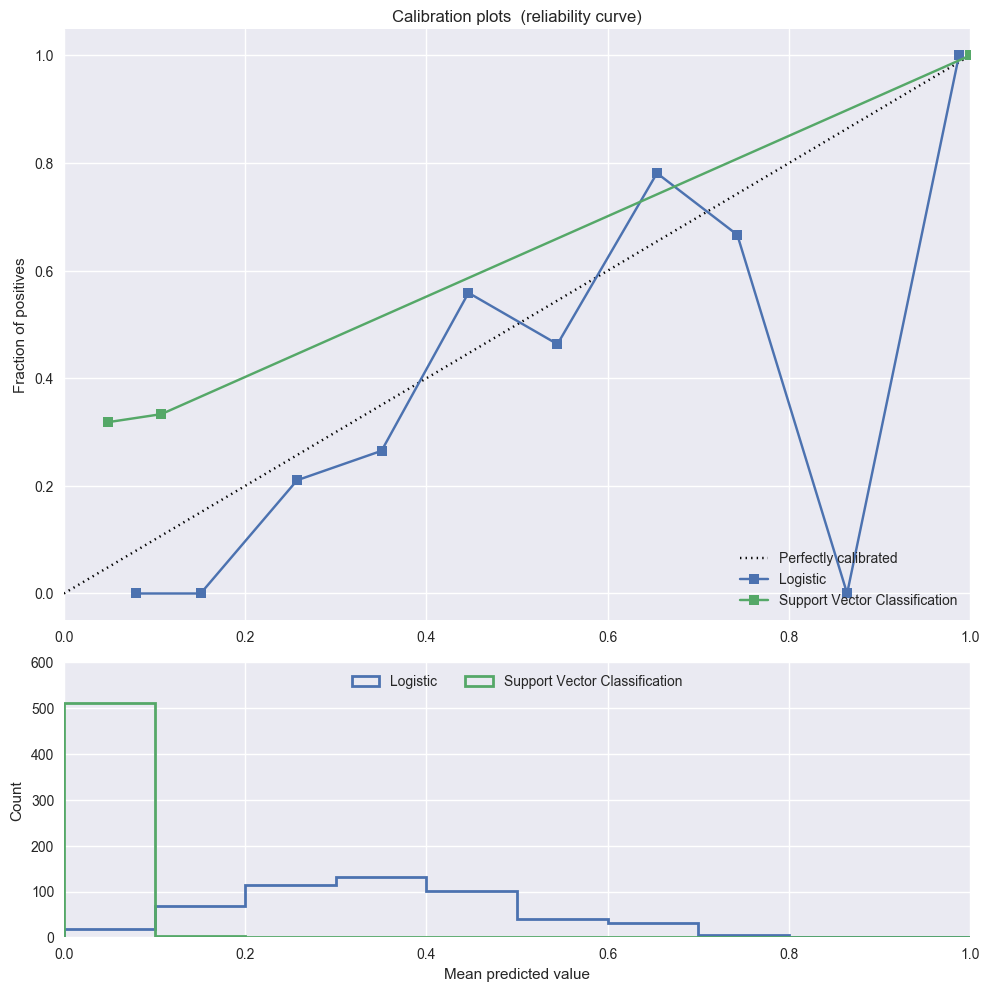

In [30]:
%time

import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve

lr = LogisticRegression()
svc = LinearSVC(C=1.0)

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic'),
                  (svc, 'Support Vector Classification')]:
    clf.fit(X_train_new, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test_new)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test_new)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

# Author: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
# License: BSD Style.

### SECTION 3 [30 Points]

1. Use the weights from logistic regression to interpret the importance of different features for the classification task. 
2. Explain your interpretation in detail. Why do you think some variables are more important?

### SECTION 4 [10 Points]

Look at the chosen support vectors for the classification task. 
1. Do these provide any insight into the data? Explain. 
2. If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model— then analyze the support vectors from the subsampled dataset.